In [15]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [16]:
import os, getpass

def set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

set_env("OPENAI_API_KEY")

In [17]:
import gdown

file_id = "1g8ybWMjFVrasbaXPgH64hD9Er57pL6Cj"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, output="image.png", quiet=False)

FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1g8ybWMjFVrasbaXPgH64hD9Er57pL6Cj

but Gdown can't. Please check connections and permissions.

In [18]:
from PIL import Image

img = Image.open("image.png").convert("RGB")
img_resized = img.resize((512,512))

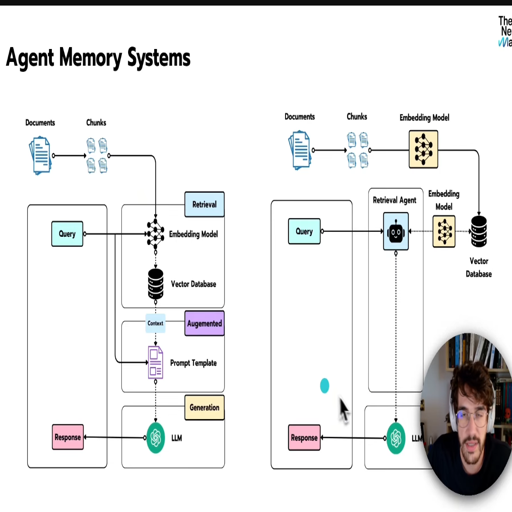

In [ ]:
img_resized

In [19]:
import base64
from io import BytesIO

def encode_image(image: Image.Image) -> str:
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()
base64_image = encode_image(img_resized)

In [20]:
from openai import OpenAI  
client = OpenAI()

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Describe what you are seeing the picture",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpg;base64,{base64_image}"
                    },
                },
            ],
        }
    ],
    model = "gpt-4o",
)

In [21]:
print(chat_completion.choices[0].message.content)

The image illustrates two diagrammatic representations of "Agent Memory Systems."

### Left Diagram:
- **Documents**: Input is shown as documents that are divided into chunks.
- **Embedding Model**: Chunks are processed through an embedding model.
- **Vector Database**: Embeddings are stored in a vector database.
- **Retrieval**: A retrieval step occurs, where a query interacts with the vector database to fetch relevant data.
- **Augmentation**: Retrieved information is augmented using a prompt template.
- **Generation**: The augmented data is fed into a Language Model (LLM) which produces a response.

### Right Diagram:
- **Documents** and **Chunks**: Similar initial input as the left diagram.
- **Retrieval Agent**: Includes a distinct retrieval agent step utilizing the embedding model and vector database for query processing.
- **Embedding and Response**: Similar to the left diagram, embeddings are utilized, and the final output is generated as a response. 

Both diagrams highlight t